In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_geneder = pd.read_csv('corrected_data.csv')
data_geneder


,Gender,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
2,F,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
3,F,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
4,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
...,...,...,...,...,...,...,...,...,...
2864,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,10
2865,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8
2866,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
2867,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


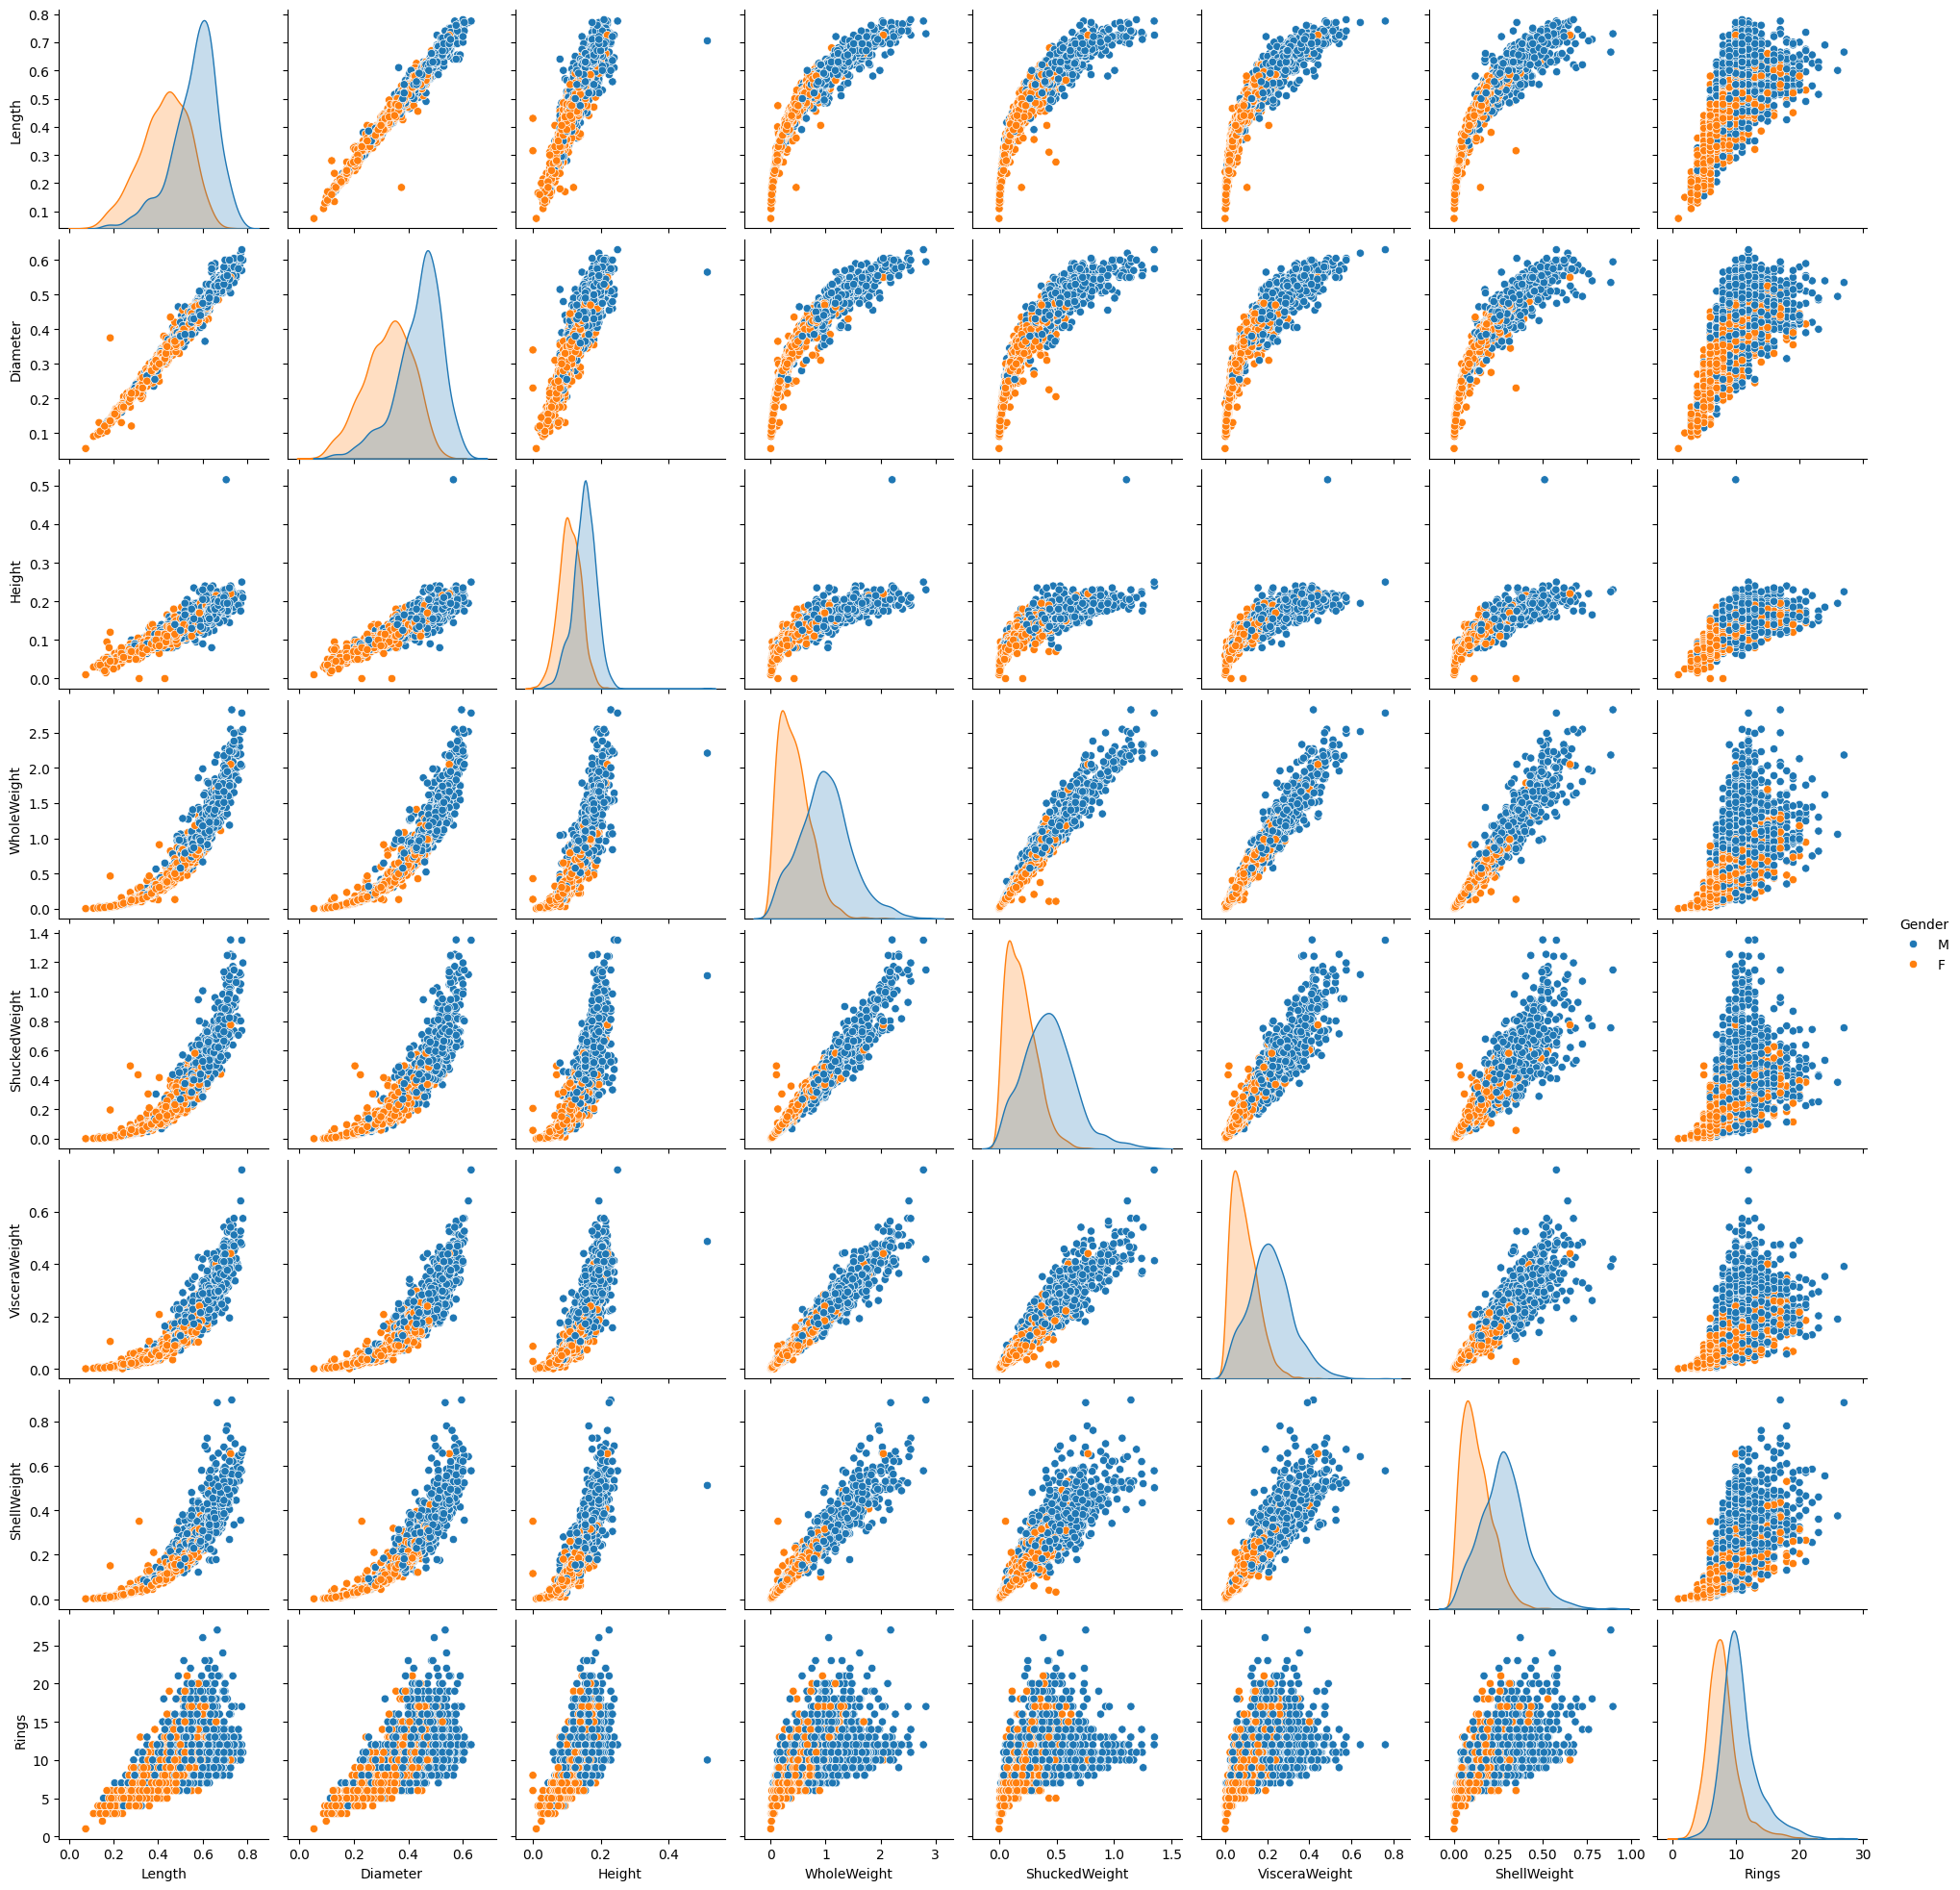

In [3]:
sns.pairplot(data_geneder, hue='Gender')

<Axes: xlabel='Diameter', ylabel='ShuckedWeight'>

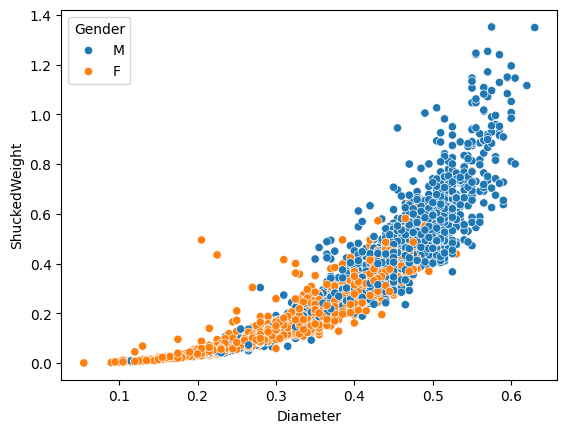

In [4]:
sns.scatterplot(x='Diameter', y='ShuckedWeight', data=data_geneder, hue='Gender')

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = data_geneder.drop('Gender', axis=1  )
y = data_geneder['Gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
1962,0.740,0.595,0.190,2.3235,1.1495,0.5115,0.5050,11
1839,0.680,0.520,0.165,1.4775,0.7240,0.2790,0.4060,11
655,0.645,0.520,0.175,1.5610,0.7090,0.3555,0.4000,8
610,0.480,0.385,0.145,0.6400,0.2925,0.1405,0.1575,6
2228,0.300,0.230,0.075,0.1500,0.0605,0.0420,0.0450,5
...,...,...,...,...,...,...,...,...
1638,0.635,0.505,0.190,1.3315,0.5805,0.2520,0.4350,17
1095,0.530,0.430,0.135,0.6255,0.2450,0.1455,0.2135,10
1130,0.575,0.450,0.125,0.7800,0.3275,0.1880,0.2350,9
1294,0.525,0.405,0.145,0.6965,0.3045,0.1535,0.2100,8


In [7]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [9]:
# check accuracy 
accuracy = knn_model.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


In [10]:
## use another ML model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_accuracy = rf_model.score(X_test, y_test)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')

Random Forest Accuracy: 0.83


In [11]:
# use another ML model
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_accuracy = svm_model.score(X_test, y_test)
print(f'SVM Accuracy: {svm_accuracy:.2f}')


SVM Accuracy: 0.84


In [12]:
# save the model
import joblib
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

In [17]:
X_train.iloc[0].values

array([ 0.74  ,  0.595 ,  0.19  ,  2.3235,  1.1495,  0.5115,  0.505 ,
       11.    ])

In [20]:
svm_model.predict([[ 0.74  ,  0.595 ,  0.19  ,  2.3235,  1.1495,  0.5115,  0.505 ,
       11.    ]])

c:\Users\eeuma\miniconda3\envs\streamlit_env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['M'], dtype=object)

ValueError: could not convert string to float: 'M'